## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense( units=n_units,
                                    activation="relu",
                                    name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense( units=n_units,
                                    activation="relu",
                                    name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(input=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [32, 128, 256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bachSize in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=bachSize, 
            validation_data=(x_test, y_test), 
            shuffle=True)

    # Collect result
    train_loss=model.history.history["loss"]
    valid_loss=model.history.history["val_loss"]
    train_acc=model.history.history["acc"]
    vaild_acc=model.history.history["val_acc"]


W0720 22:27:50.426202  5200 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 22:27:50.445153  5200 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 22:27:50.449152  5200 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 22:27:50.524935  5200 deprecation_wrapper.py:119] From C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,740,938
Trainable params: 1,739,914
Non-trainable params: 1,024
______________________________________________________________

C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7723 - acc: 0.3740 - val_loss: 1.6578 - val_acc: 0.4193
Epoch 2/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5364 - acc: 0.4582 - val_loss: 1.5593 - val_acc: 0.4392
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.4441 - acc: 0.4912 - val_loss: 1.5167 - val_acc: 0.4560
Epoch 4/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.3821 - acc: 0.5140 - val_loss: 1.5121 - val_acc: 0.4602
Epoch 5/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.3297 - acc: 0.5315 - val_loss: 1.6741 - val_acc: 0.4164
Epoch 6/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.2889 - acc: 0.5469 - val_loss: 1.5568 - val_acc: 0.4548
Epoch 7/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.2482 - acc: 0.5608 - val_loss: 1.

C:\Users\shoey\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.8692 - acc: 0.3418 - val_loss: 1.7185 - val_acc: 0.3805
Epoch 2/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6016 - acc: 0.4391 - val_loss: 1.6115 - val_acc: 0.4251
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.5030 - acc: 0.4735 - val_loss: 1.5396 - val_acc: 0.4534
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.4331 - acc: 0.4980 - val_loss: 1.5413 - val_acc: 0.4484
Epoch 5/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.3797 - acc: 0.5178 - val_loss: 1.5101 - val_acc: 0.4618
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.3338 - acc: 0.5342 - val_loss: 1.4648 - val_acc: 0.4794
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.2906 - acc: 0.5498 - val_loss: 1.4943 - 

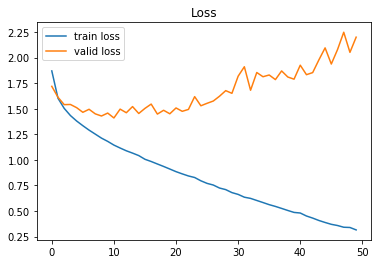

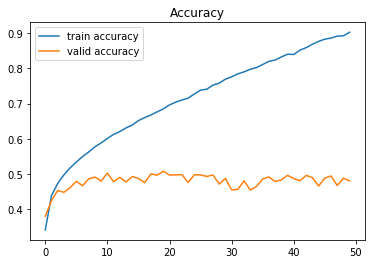

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(vaild_acc)), vaild_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [14]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [16]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 406,922
Trainable params: 400,778
Non-trainable params: 6,144
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.1772 - acc: 0.2506 - val_loss: 1.8744 - val_acc: 0.3447
Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - lo

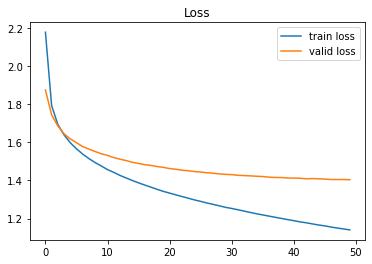

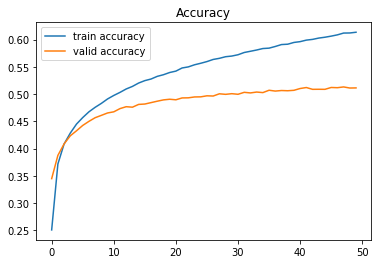

In [17]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [18]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [19]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [20]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 395,146
Trainable params: 394,890
Non-trainable params: 256
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 70us/step - loss: 2.1368 - acc: 0.2640 - val_loss: 2.0664 - val_acc: 0.3018
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 

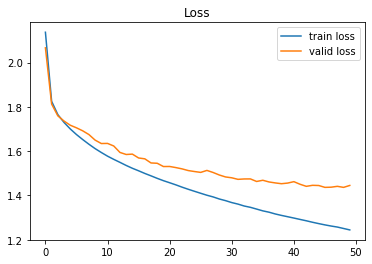

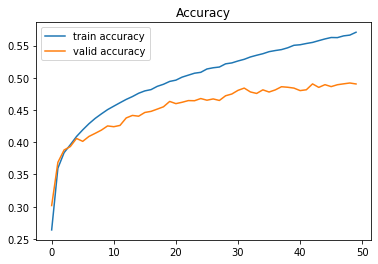

In [21]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()